In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
defPt    = np.load(r'/Users/louxsoen/Documents/Univ/부채널연구/Traces/AES/trace_20000/2022.03.25-06.05.29_textin.npy')
defTrace = np.load(r'/Users/louxsoen/Documents/Univ/부채널연구/Traces/AES/trace_20000/2022.03.25-06.05.29_traces.npy')
#atkPt    = np.load(r'/Users/louxsoen/Documents/Univ/부채널연구/Traces/AES/trace_10000/2022.03.25-05.40.47_textin.npy')
#atkTrace = np.load(r'/Users/louxsoen/Documents/Univ/부채널연구/Traces/AES/trace_10000/2022.03.25-05.40.47_traces.npy')

In [3]:
sbox = (
    0x63, 0x7c, 0x77, 0x7b, 0xf2, 0x6b, 0x6f, 0xc5, 0x30, 0x01, 0x67, 0x2b, 0xfe, 0xd7, 0xab, 0x76,
    0xca, 0x82, 0xc9, 0x7d, 0xfa, 0x59, 0x47, 0xf0, 0xad, 0xd4, 0xa2, 0xaf, 0x9c, 0xa4, 0x72, 0xc0,
    0xb7, 0xfd, 0x93, 0x26, 0x36, 0x3f, 0xf7, 0xcc, 0x34, 0xa5, 0xe5, 0xf1, 0x71, 0xd8, 0x31, 0x15,
    0x04, 0xc7, 0x23, 0xc3, 0x18, 0x96, 0x05, 0x9a, 0x07, 0x12, 0x80, 0xe2, 0xeb, 0x27, 0xb2, 0x75,
    0x09, 0x83, 0x2c, 0x1a, 0x1b, 0x6e, 0x5a, 0xa0, 0x52, 0x3b, 0xd6, 0xb3, 0x29, 0xe3, 0x2f, 0x84,
    0x53, 0xd1, 0x00, 0xed, 0x20, 0xfc, 0xb1, 0x5b, 0x6a, 0xcb, 0xbe, 0x39, 0x4a, 0x4c, 0x58, 0xcf,
    0xd0, 0xef, 0xaa, 0xfb, 0x43, 0x4d, 0x33, 0x85, 0x45, 0xf9, 0x02, 0x7f, 0x50, 0x3c, 0x9f, 0xa8,
    0x51, 0xa3, 0x40, 0x8f, 0x92, 0x9d, 0x38, 0xf5, 0xbc, 0xb6, 0xda, 0x21, 0x10, 0xff, 0xf3, 0xd2,
    0xcd, 0x0c, 0x13, 0xec, 0x5f, 0x97, 0x44, 0x17, 0xc4, 0xa7, 0x7e, 0x3d, 0x64, 0x5d, 0x19, 0x73,
    0x60, 0x81, 0x4f, 0xdc, 0x22, 0x2a, 0x90, 0x88, 0x46, 0xee, 0xb8, 0x14, 0xde, 0x5e, 0x0b, 0xdb,
    0xe0, 0x32, 0x3a, 0x0a, 0x49, 0x06, 0x24, 0x5c, 0xc2, 0xd3, 0xac, 0x62, 0x91, 0x95, 0xe4, 0x79,
    0xe7, 0xc8, 0x37, 0x6d, 0x8d, 0xd5, 0x4e, 0xa9, 0x6c, 0x56, 0xf4, 0xea, 0x65, 0x7a, 0xae, 0x08,
    0xba, 0x78, 0x25, 0x2e, 0x1c, 0xa6, 0xb4, 0xc6, 0xe8, 0xdd, 0x74, 0x1f, 0x4b, 0xbd, 0x8b, 0x8a,
    0x70, 0x3e, 0xb5, 0x66, 0x48, 0x03, 0xf6, 0x0e, 0x61, 0x35, 0x57, 0xb9, 0x86, 0xc1, 0x1d, 0x9e,
    0xe1, 0xf8, 0x98, 0x11, 0x69, 0xd9, 0x8e, 0x94, 0x9b, 0x1e, 0x87, 0xe9, 0xce, 0x55, 0x28, 0xdf,
    0x8c, 0xa1, 0x89, 0x0d, 0xbf, 0xe6, 0x42, 0x68, 0x41, 0x99, 0x2d, 0x0f, 0xb0, 0x54, 0xbb, 0x16 )

MK = ( 0x01, 0x23, 0x45, 0x67, 0x89, 0xab, 0xcd, 0xef, 0x12, 0x34, 0x56, 0x78, 0x9a, 0xbc, 0xde, 0xf0 )
#파형 자르기 해보기
trNum = len(defTrace)
trLen = 150
'''
cutTrace = np.zeros((trNum, 150))

for i in range(trNum):
    cutTrace[i] = defTrace[i][1500:1650] 
    '''

iv = np.zeros(trNum)
for i in range(trNum):
    temp = sbox[defPt[i][0] ^ MK[0]]
    #temp = defPt[i][0]
    for j in range(8):
        iv[i] += (temp >> j) & 1

x_train, x_test = train_test_split(defTrace, test_size = 0.3, shuffle = False)
y_train, y_test = train_test_split(iv , test_size = 0.3, shuffle = False)

In [4]:
print("x train |", x_train.shape)
print("x test  |", x_test.shape)
print("y train |", y_train.shape)
print("y test  |", y_test.shape)
print("trNum   |", len(defTrace))

x train | (14000, 24000)
x test  | (6000, 24000)
y train | (14000,)
y test  | (6000,)
trNum   | 20000


<h1>THIS IS MLP!!!!! 제발!!!!!수정하지마!!!!!</h1>

In [5]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units = 128, name = 'Input', activation = 'relu', input_dim = x_train.shape[1]),
    
    tf.keras.layers.Dense(units = 256, activation = 'relu', kernel_initializer='he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate= 0.2),
    
    tf.keras.layers.Dense(units = 256, activation = 'softmax', kernel_initializer='he_normal')
])
model.compile(
    optimizer = tf.keras.optimizers.Adam(lr=0.001),
    loss = "sparse_categorical_crossentropy",
    metrics =["accuracy"]
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (Dense)               (None, 128)               3072128   
                                                                 
 dense (Dense)               (None, 256)               33024     
                                                                 
 batch_normalization (BatchN  (None, 256)              1024      
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
Total params: 3,171,968
Trainable params: 3,171,456
Non-trainable params: 512
____________________________________________

2022-04-01 03:07:16.808818: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [6]:
history = model.fit(x_train, y_train, epochs = 25, verbose = 1)

Epoch 1/25
438/438 [==============================] - 7s 16ms/step - loss: 2.2314 - accuracy: 0.2814
Epoch 2/25
438/438 [==============================] - 7s 16ms/step - loss: 1.4241 - accuracy: 0.3772
Epoch 3/25
438/438 [==============================] - 7s 16ms/step - loss: 1.2440 - accuracy: 0.4547
Epoch 4/25
438/438 [==============================] - 7s 16ms/step - loss: 1.1064 - accuracy: 0.5139
Epoch 5/25
438/438 [==============================] - 7s 15ms/step - loss: 1.0158 - accuracy: 0.5581
Epoch 6/25
438/438 [==============================] - 7s 15ms/step - loss: 0.9310 - accuracy: 0.5958
Epoch 7/25
438/438 [==============================] - 7s 15ms/step - loss: 0.8736 - accuracy: 0.6197
Epoch 8/25
438/438 [==============================] - 7s 15ms/step - loss: 0.8385 - accuracy: 0.6429
Epoch 9/25
438/438 [==============================] - 7s 15ms/step - loss: 0.8017 - accuracy: 0.6559
Epoch 10/25
438/438 [==============================] - 7s 15ms/step - loss: 0.7623 - accura

x_test     | [3 3 3 3 3 3 3 3 3 3]
y_test     | [4. 1. 4. 5. 4. 3. 3. 3. 2. 5.]
test model |      Loss : 14.53549575805664
           | Accuaracy : 0.2318333387374878


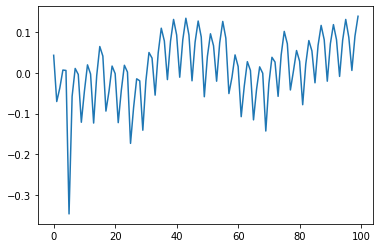

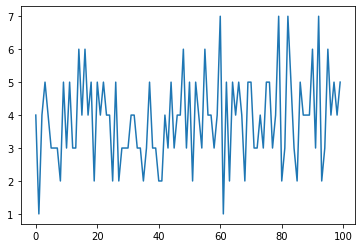

In [7]:
predictions = model.predict(x_test)

print("x_test     |", np.argmax(predictions[:10], axis = 1))
print("y_test     |", y_test[:10])

output_test_result = model.evaluate(x_test, y_test, verbose=0)
print('test model |      Loss :', output_test_result[0])
print('           | Accuaracy :', output_test_result[1])

plt.plot(x_test[0][:100])
plt.show()
plt.plot(y_test[:100])
plt.show()

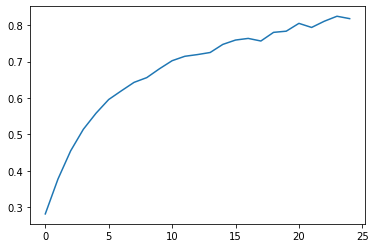

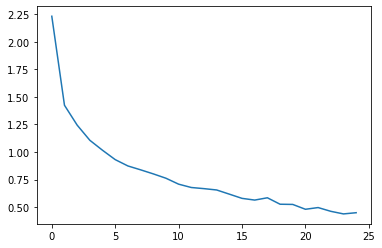

In [8]:
plt.plot(history.history['accuracy'])
plt.show()

plt.plot(history.history['loss'])
plt.show()